In [2]:
# Install openml library
!pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.0/158.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 38.8 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=d83b499261b03a0f46f1bfecc38b3a2fb30f52ddf393607bae3f06f67da82ccf
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [5]:
import openml
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set custom OpenML directory in Google Colab's writable space
openml.config.cache_directory = "/content/openml_data"


# Load the dataset from OpenML
dataset_id = 1597  # ID for the dataset on OpenML
df = openml.datasets.get_dataset(dataset_id).get_data()[0]

# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
# Display basic statistics
print("\nDataset statistics:")
print(df.describe())


Dataset statistics:
                 V1            V2            V3            V4            V5  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15  9.604066e-16   
std    1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00  1.380247e+00   
min   -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00 -1.137433e+02   
25%   -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01 -6.915971e-01   
50%    1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02 -5.433583e-02   
75%    1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01  6.119264e-01   
max    2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01  3.480167e+01   

                 V6            V7            V8            V9           V10  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.487313e-15 -5.556467e-16  1.205498e-16 -2.406306e-15  2.238853e-15   
std    1.332271e+00  1.237094e

In [8]:
# Display dataset information
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   V1      284807 non-null  float64 
 1   V2      284807 non-null  float64 
 2   V3      284807 non-null  float64 
 3   V4      284807 non-null  float64 
 4   V5      284807 non-null  float64 
 5   V6      284807 non-null  float64 
 6   V7      284807 non-null  float64 
 7   V8      284807 non-null  float64 
 8   V9      284807 non-null  float64 
 9   V10     284807 non-null  float64 
 10  V11     284807 non-null  float64 
 11  V12     284807 non-null  float64 
 12  V13     284807 non-null  float64 
 13  V14     284807 non-null  float64 
 14  V15     284807 non-null  float64 
 15  V16     284807 non-null  float64 
 16  V17     284807 non-null  float64 
 17  V18     284807 non-null  float64 
 18  V19     284807 non-null  float64 
 19  V20     284807 non-null  float64 
 20  V21 

In [9]:
# Check for class imbalance
print("\nClass distribution:")
print(df['Class'].value_counts())


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


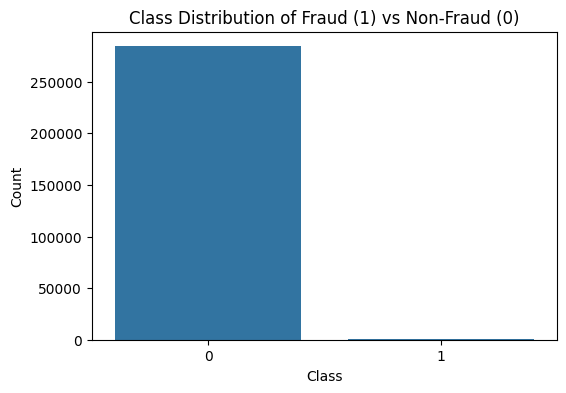

In [10]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution of Fraud (1) vs Non-Fraud (0)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

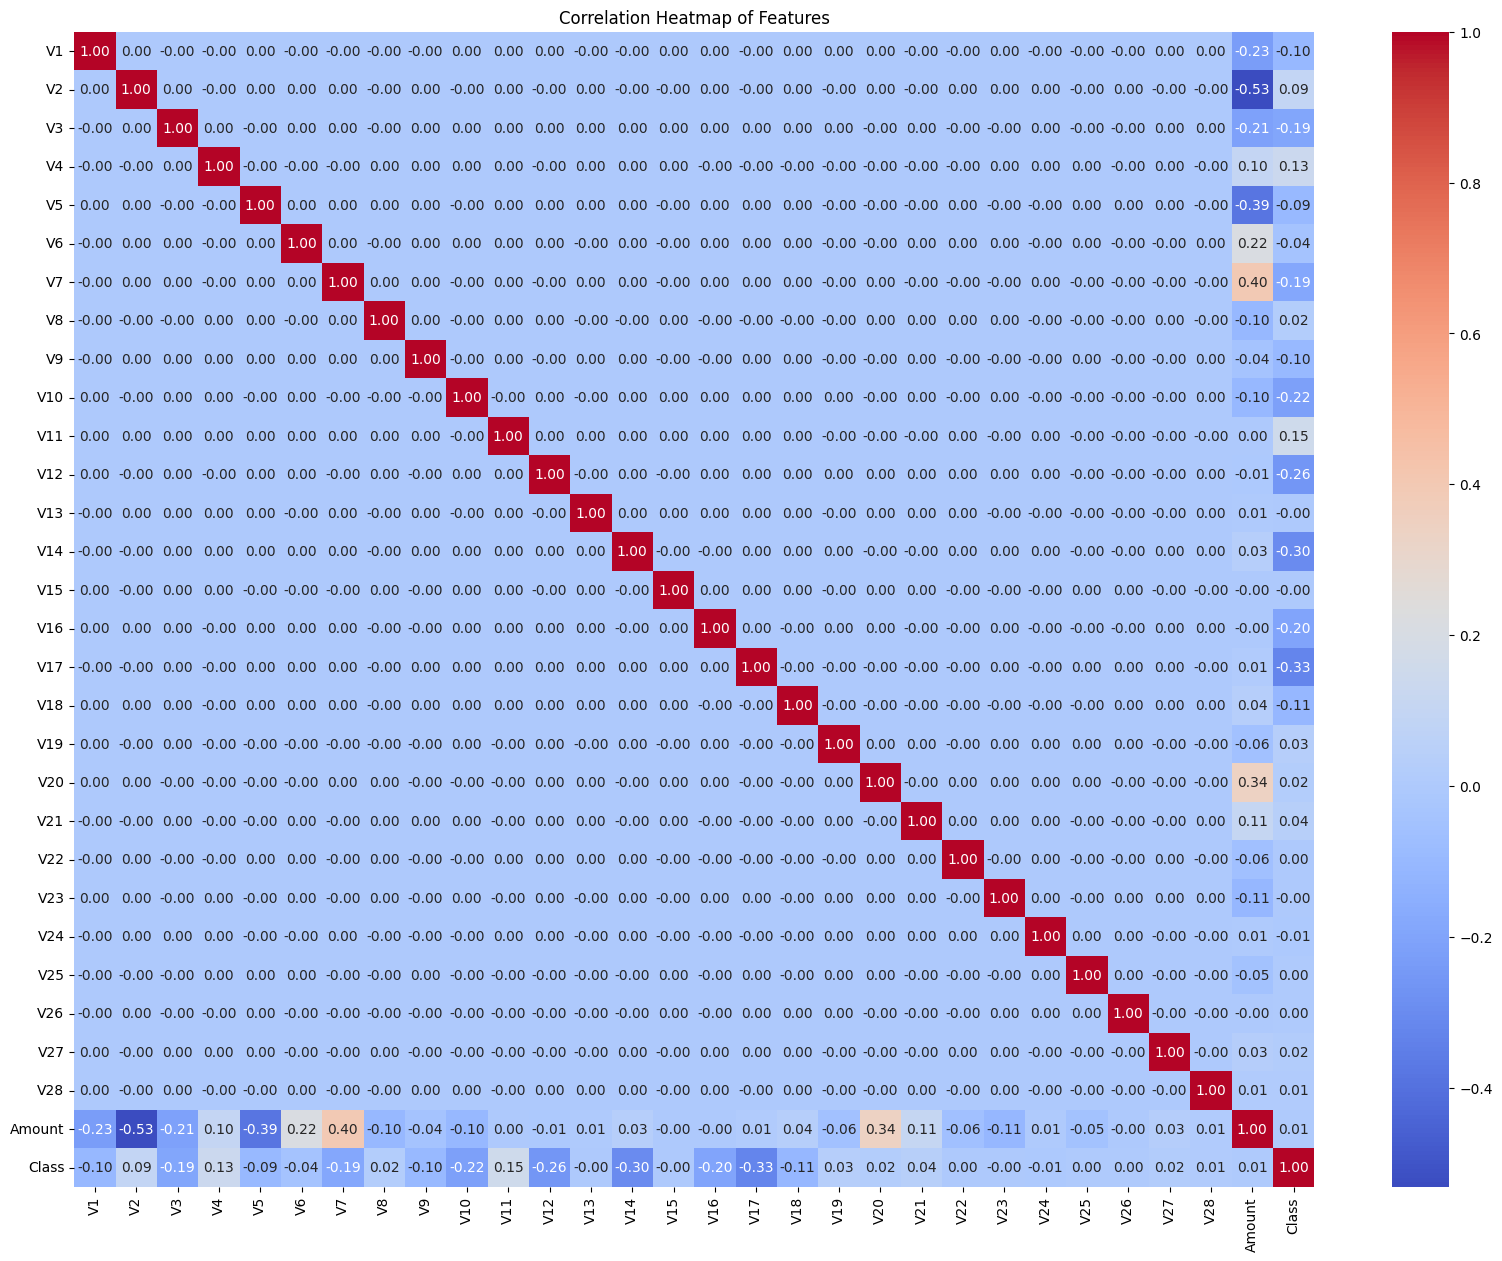

In [13]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap with annotations
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()